In [1]:
import cv2 as cv
import numpy as np
import scipy as sp
from scipy import signal
import matplotlib.pyplot as plt

([], [])

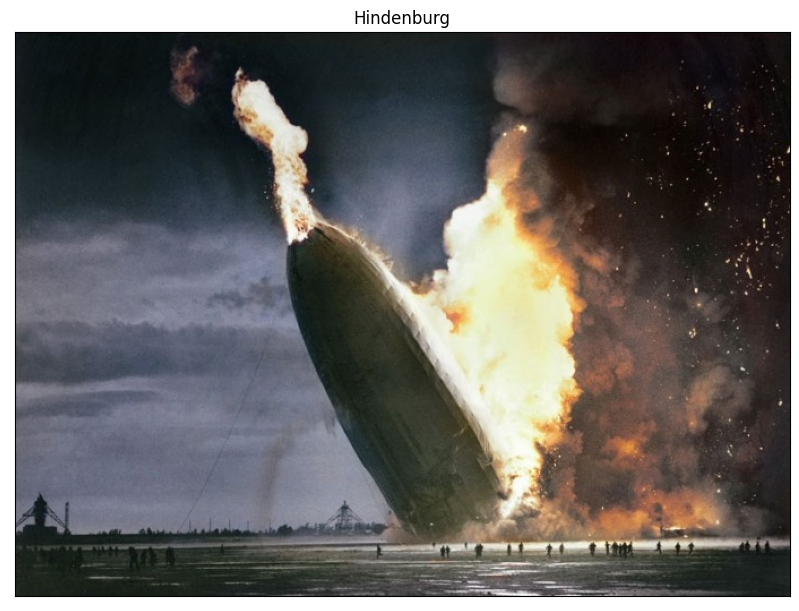

In [2]:
img = cv.imread('data/hindenburg.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.figure(figsize=(10,10))
plt.title('Hindenburg')
plt.imshow(img)
plt.xticks([])
plt.yticks([])

In [3]:
## Task 1: Construction
# Construct and visualize a 11x11 Gaussian kernel for  σ = [1,3,5]

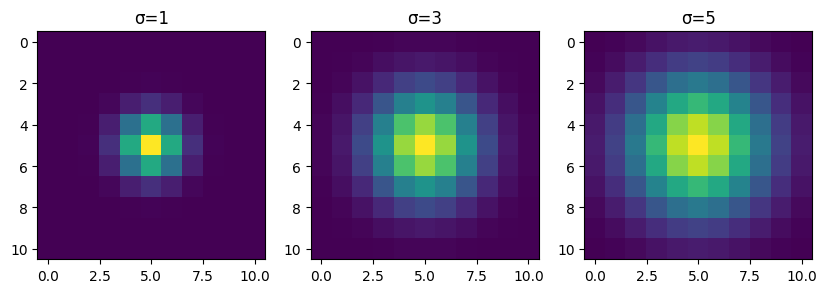

In [4]:
def gaussian2_xy(mean, cov, xy):
    invcov = np.linalg.inv(cov)
    results = np.ones([xy.shape[0], xy.shape[1]])
    for x in range(0, xy.shape[0]):
        for y in range(0, xy.shape[1]):
            v = xy[x,y,:].reshape(2,1) - mean
            results[x,y] = np.dot(np.dot(np.transpose(v), invcov), v)
    results = np.exp( - results / 2 )
    return results 

def gaussian2_n(mean, cov, n):
    s = n//2
    x = np.linspace(-s,s,n)
    y = np.linspace(-s,s,n)
    xc, yc = np.meshgrid(x, y)
    xy = np.zeros([n, n, 2])
    xy[:,:,0] = xc
    xy[:,:,1] = yc
    return gaussian2_xy(mean, cov, xy), xc, yc
    
n = 11
vars = [1, 3, 5]
kernels = []
plt.figure(figsize=(10,10))
for i in range(len(vars)):
    mean =  np.array([0, 0])
    mean = mean.reshape(2, 1)
    cov = np.array([[vars[i], 0],[0, vars[i]]])
    g2d_kernel, xc, yc = gaussian2_n(mean, cov, n)
    g2d_kernel_normalized = g2d_kernel / np.sum(g2d_kernel)
    kernels.append(g2d_kernel_normalized)
    plt.subplot(1, len(vars), i+1)
    plt.title('σ=' + str(vars[i]))
    plt.imshow(g2d_kernel_normalized)

plt.show()

In [5]:
## Task 2: Convolution
# Convolve the hindenburg image with the three Gaussian kernels and show the results

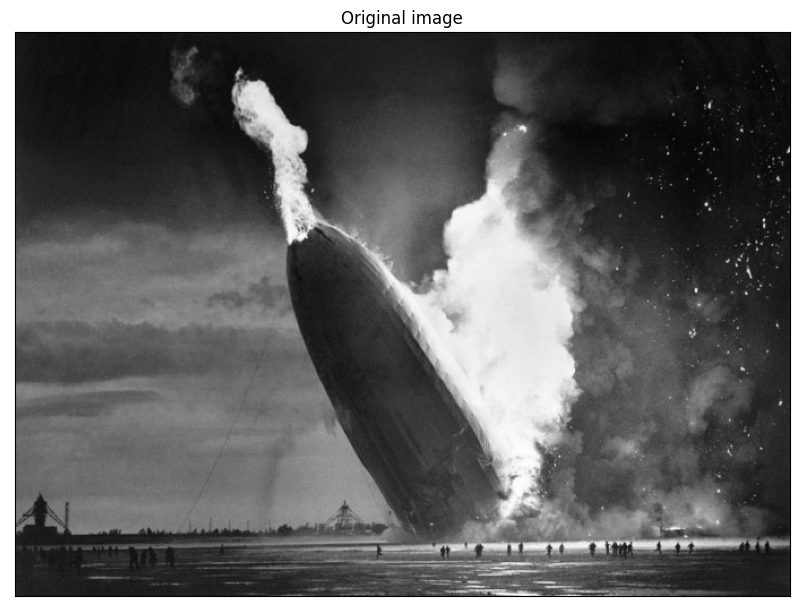

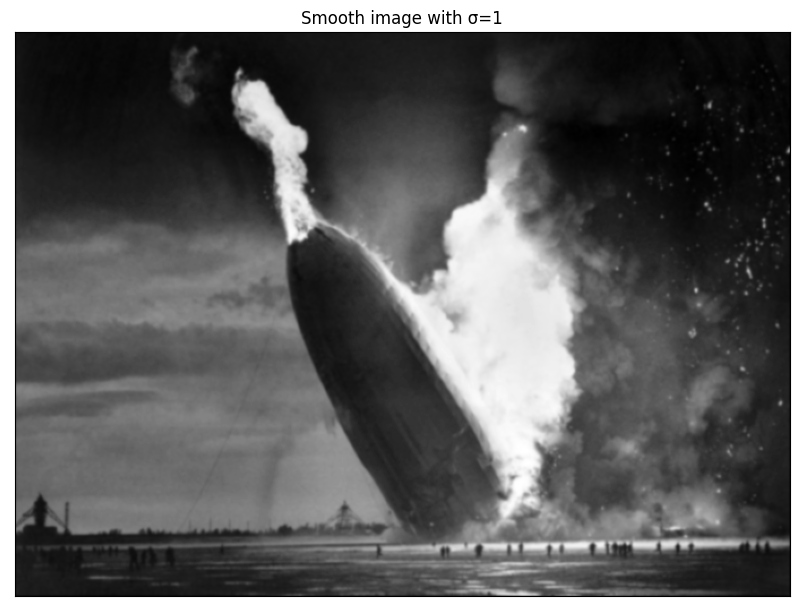

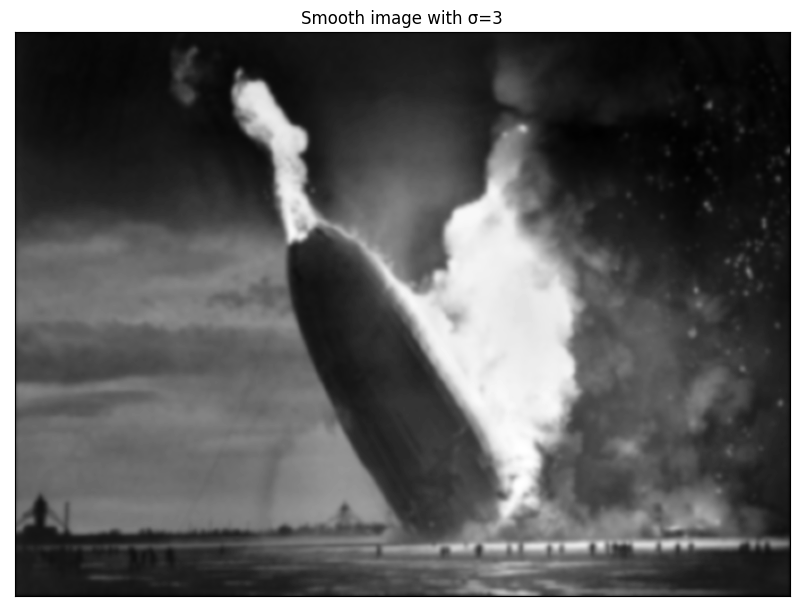

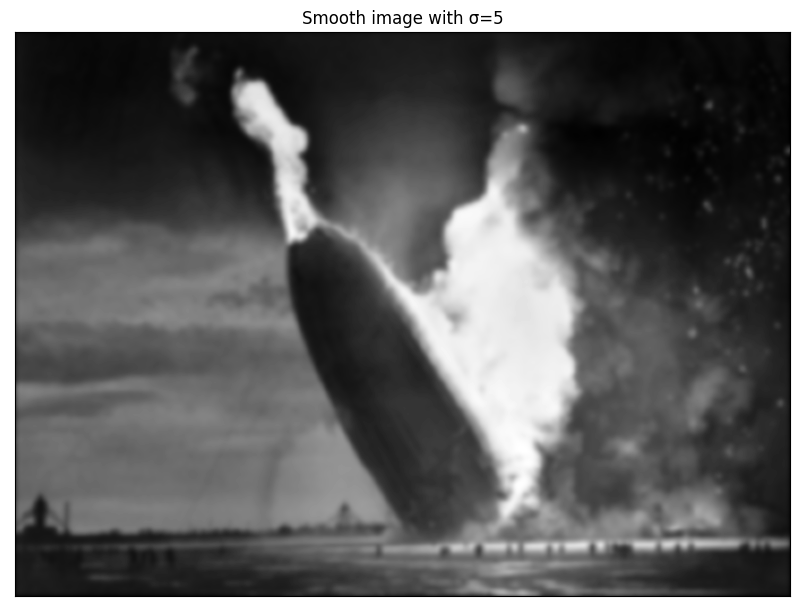

In [6]:
plt.figure(figsize=(10,10))
img = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
plt.title('Original image')
plt.imshow(img, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.show()

for i in range(0, len(kernels)):
    plt.figure(figsize=(10,10))
    img_smooth = sp.signal.convolve2d(img, kernels[i], mode='same', boundary='fill')
    plt.title('Smooth image with σ=' + str(vars[i]))
    plt.imshow(img_smooth, cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.show()

In [7]:
## Task 3: Separability
# Consider the following kernel.
# [ 7 34 3]
# [ 0 0 0]
# [-7 -34 -3]
# Confirm that it is separable. Convolve the hindenburg image with this kernel.
# Next, exploit separability to convolve the hindenburg image. Compare the results. Are they the same, or different?

In [8]:
F = np.array([7, 34, 3, 0, 0, 0, -7, -34, -3]).reshape(3,3)
print('F =\n{}'.format(F))
u, s, vh = np.linalg.svd(F)
print(f'Singular values of F are: {s}')

if s[~np.isclose(s, 0)].shape == (1,):
    print('Filter F_original is separable')
    ind = np.where(np.isclose(s, 0) == False)[0][0]
    s_1 = s[~np.isclose(s, ind)]
    fv = np.sqrt(s_1)*u[:,ind].reshape(3,1)
    fh = np.sqrt(s_1)*vh[ind,:].reshape(1,3)
    print('fv:\n {}'.format(fv))
    print('fh:\n {}'.format(fh))
    print('F_reconstructed:\n {}'.format(np.dot(fv, fh)))
else:
    print('Filter F is not separable')

F =
[[  7  34   3]
 [  0   0   0]
 [ -7 -34  -3]]
Singular values of F are: [4.92747400e+01 4.42440018e-16 0.00000000e+00]
Filter F_original is separable
fv:
 [[-4.96360454]
 [ 0.        ]
 [ 4.96360454]]
fh:
 [[-1.41026545 -6.84986077 -0.60439948]]
F_reconstructed:
 [[  7.  34.   3.]
 [  0.   0.   0.]
 [ -7. -34.  -3.]]


([], [])

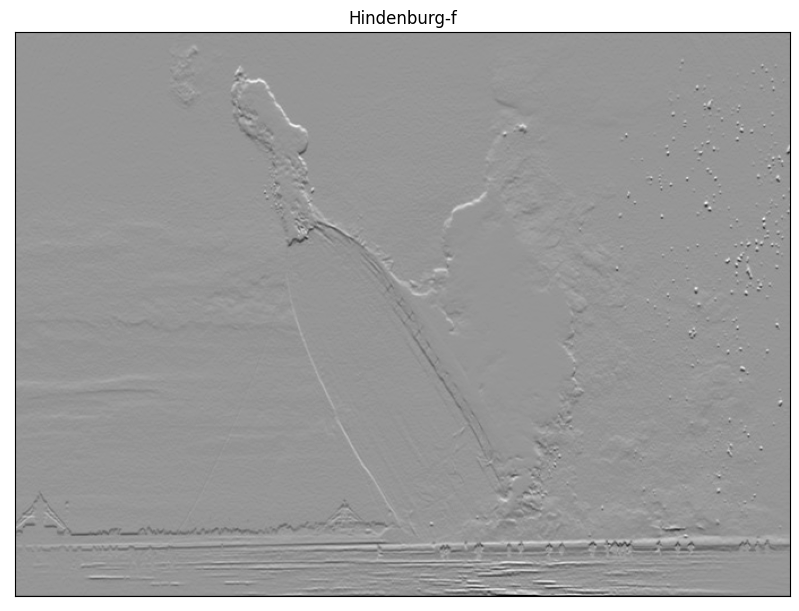

In [9]:
result_f = sp.signal.convolve2d(img, F, mode='same', boundary='fill')
plt.figure(figsize=(10,10))
plt.title('Hindenburg-f')
plt.imshow(result_f, cmap='gray')
plt.xticks([])
plt.yticks([])

Both images are the same


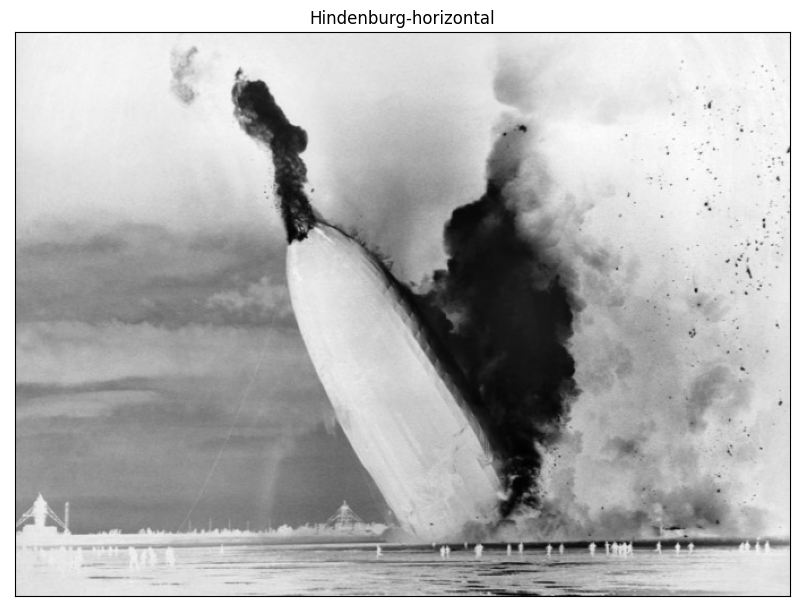

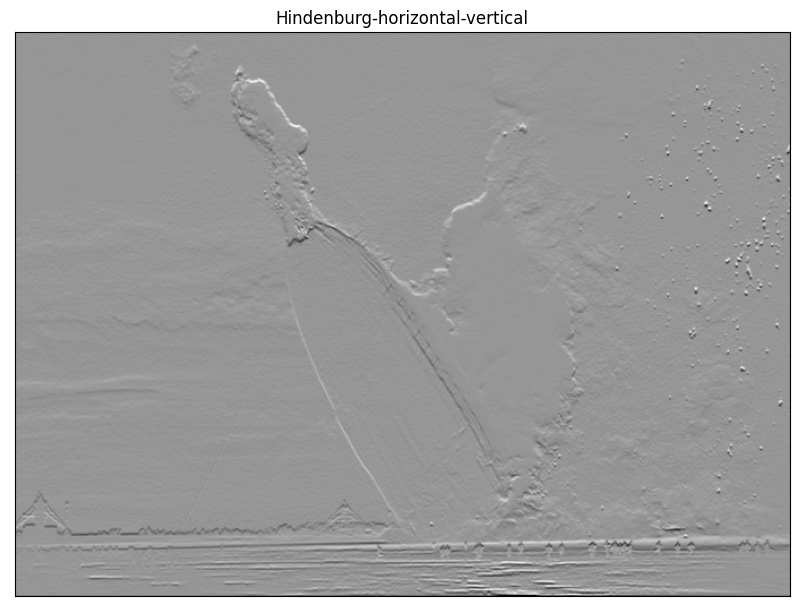

In [10]:
result_fh = sp.signal.convolve2d(img, fh, mode='same', boundary='fill')
plt.figure(figsize=(10,10))
plt.title('Hindenburg-horizontal')
plt.imshow(result_fh, cmap='gray')
plt.xticks([])
plt.yticks([])

result_fh_fv = sp.signal.convolve2d(result_fh, fv, mode='same', boundary='fill')
plt.figure(figsize=(10,10))
plt.title('Hindenburg-horizontal-vertical')
plt.imshow(result_fh_fv, cmap='gray')
plt.xticks([])
plt.yticks([])

if np.all(np.isclose(result_f - result_fh_fv, 0)) != True:
    print('Both images are not the same')
else:
    print('Both images are the same')